<a href="https://colab.research.google.com/github/abinashregmi/Semester-IV/blob/main/Lab14(SalaryDataUsingMultilayerPerceptron).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Salary Data.csv')
df.dropna(inplace=True)

X_np = df[['Years of Experience']].values.astype(np.float32)
y_np = df[['Salary']].values.astype(np.float32)

X_mean, X_std = X_np.mean(axis=0), X_np.std(axis=0)
y_mean, y_std = y_np.mean(axis=0), y_np.std(axis=0)

X_scaled = (X_np - X_mean) / X_std
y_scaled = (y_np - y_mean) / y_std

X = torch.from_numpy(X_scaled)
y = torch.from_numpy(y_scaled)


In [5]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.layers(x)

def train_model(model, X, y, learning_rate, num_epochs=1000):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X)
        loss = criterion(outputs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')

    print(f'Training complete for LR: {learning_rate}')

    weights = [param.data.clone() for param in model.parameters()]

    return losses, weights

In [7]:
learning_rates = [0.1, 0.01, 0.001]
results = {}

for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr} ")
    model = MLP()

    losses, weights = train_model(model, X, y, lr)

    results[lr] = {
        'losses': losses,
        'final_loss': losses[-1],
        'weights': weights
    }


Training with Learning Rate: 0.1 
Epoch [100/1000], Loss: 0.127231
Epoch [200/1000], Loss: 0.126671
Epoch [300/1000], Loss: 0.126335
Epoch [400/1000], Loss: 0.126064
Epoch [500/1000], Loss: 0.125925
Epoch [600/1000], Loss: 0.126219
Epoch [700/1000], Loss: 0.126220
Epoch [800/1000], Loss: 0.125743
Epoch [900/1000], Loss: 0.126150
Epoch [1000/1000], Loss: 0.125725
Training complete for LR: 0.1

Training with Learning Rate: 0.01 
Epoch [100/1000], Loss: 0.130596
Epoch [200/1000], Loss: 0.129252
Epoch [300/1000], Loss: 0.128237
Epoch [400/1000], Loss: 0.127722
Epoch [500/1000], Loss: 0.127280
Epoch [600/1000], Loss: 0.126862
Epoch [700/1000], Loss: 0.126424
Epoch [800/1000], Loss: 0.125956
Epoch [900/1000], Loss: 0.125462
Epoch [1000/1000], Loss: 0.125086
Training complete for LR: 0.01

Training with Learning Rate: 0.001 
Epoch [100/1000], Loss: 0.581448
Epoch [200/1000], Loss: 0.197822
Epoch [300/1000], Loss: 0.146312
Epoch [400/1000], Loss: 0.144522
Epoch [500/1000], Loss: 0.143045
Epoc

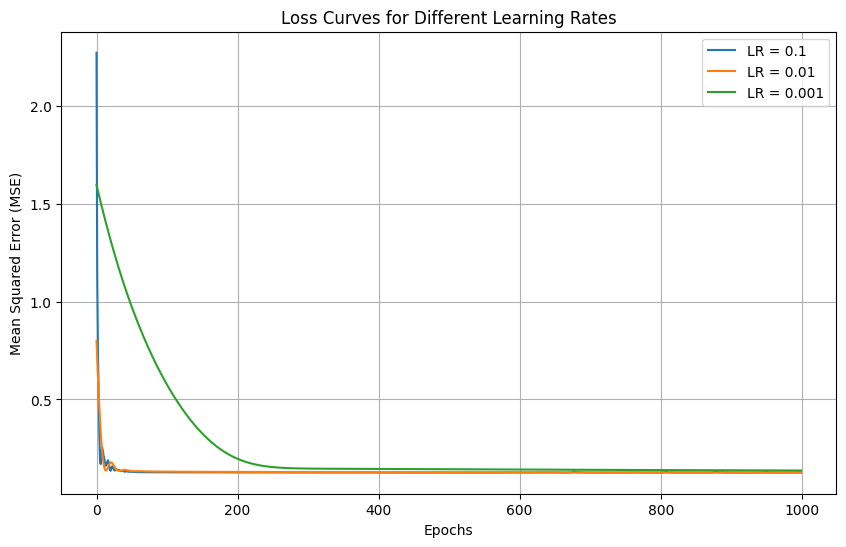

In [9]:
plt.figure(figsize=(10, 6))
for lr, data in results.items():
    plt.plot(data['losses'], label=f'LR = {lr}')

plt.title('Loss Curves for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.savefig('loss_curves.png')
plt.show()